In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import  ARMA
from scipy.stats.distributions import chi2
sns.set()
import warnings
warnings.filterwarnings("ignore")


In [90]:
df = pd.read_csv('RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq='D'
df.head()
df1 = df.dropna(subset=["total"])

In [91]:
cols=['rest1','rest2','rest3','rest4','total']
for col in cols:
    df1[col]=df1[col].astype(int)

[Text(0, 0.5, 'Visitors per day'), Text(0.5, 0, '')]

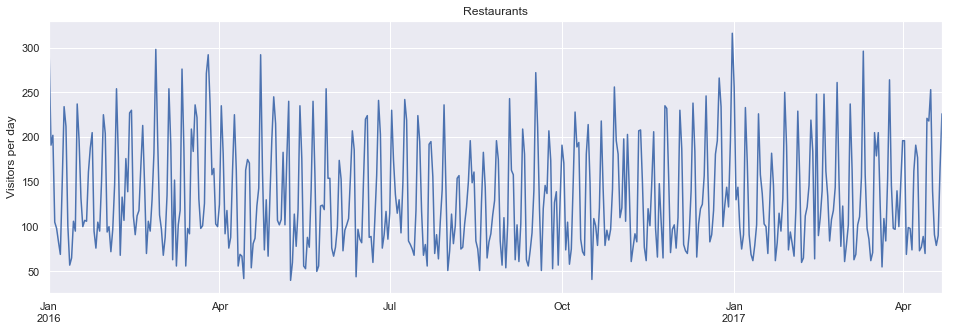

In [92]:
title="Restaurants"
ylabel='Visitors per day'
xlabel=''
ax=df1.total.plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)

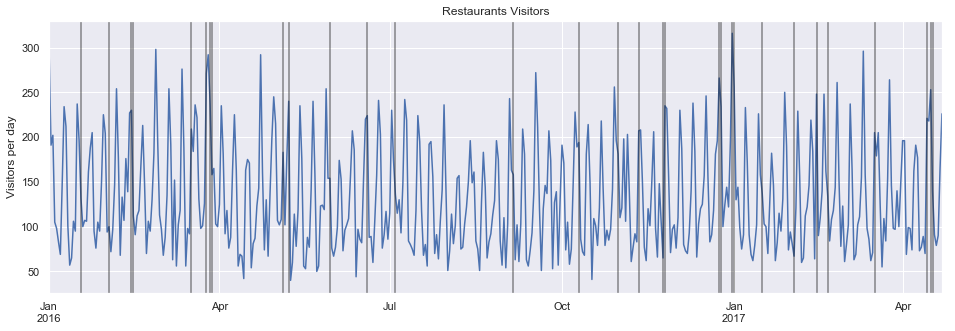

In [93]:
title="Restaurants Visitors"
ylabel='Visitors per day'
xlabel=''
ax=df1.total.plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for x in df1.query('holiday==1').index:
    ax.axvline(x=x,color='k',alpha=.5)

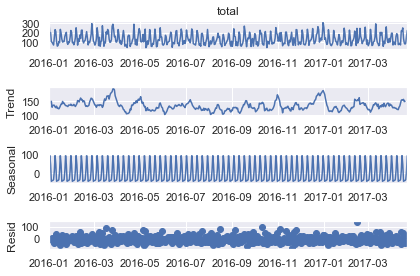

In [94]:
resd = seasonal_decompose(df1.total)
resd.plot();

In [95]:
breakpoint = len(df1)-42#int(.8*len(df1))
train, test = df1.iloc[:breakpoint], df1.iloc[breakpoint:]
len(train), breakpoint, len(test)

(436, 436, 42)

In [34]:
auto_order=auto_arima(train.total
                       , max_order=6
                       , d=1, D=1, m=7
                       , max_p=4, max_q=4, max_P=4, max_Q=4
                       , stepwise=True
                       , suppress_warnings=True
                       , trace=True
                      )
auto_order

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,1,1,7) [intercept=True]; AIC=4237.976, BIC=4270.449, Time=1.717 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=4702.154, BIC=4710.273, Time=0.023 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=4480.416, BIC=4496.652, Time=0.491 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=4235.658, BIC=4251.894, Time=1.337 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=4700.183, BIC=4704.243, Time=0.017 seconds
Fit ARIMA(2,1,2)x(0,1,1,7) [intercept=True]; AIC=4236.184, BIC=4264.598, Time=1.443 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,2)x(1,1,0,7) [intercept=True]; AIC=4378.118, BIC=4406.532, Time=1.400 seco

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 1, 1, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

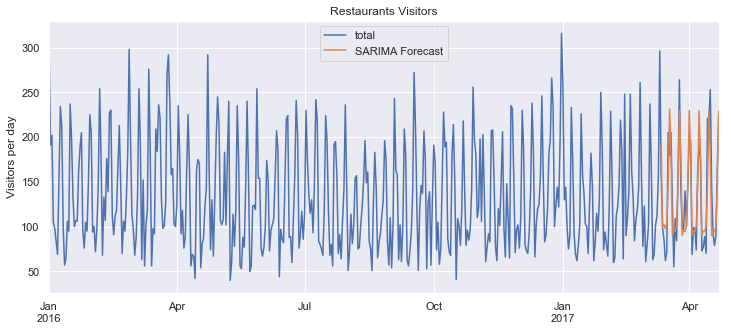

In [117]:
model=SARIMAX(train.total, order=(3,1,1), seasonal_order=(1,1,1,7))
results=model.fit()
results.summary()
start = len(train)
end = len(train)+len(test)-1
fcast=results.predict(start, end).rename('SARIMA Forecast')
ax = df1.total.plot(legend=True, figsize=(12,5), title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [120]:
from statsmodels.tools.eval_measures import rmse
np.sqrt(results.mse), np.sqrt(np.mean((test.total-fcast)**2))
rmse(test.total, fcast)



30.25050762050121

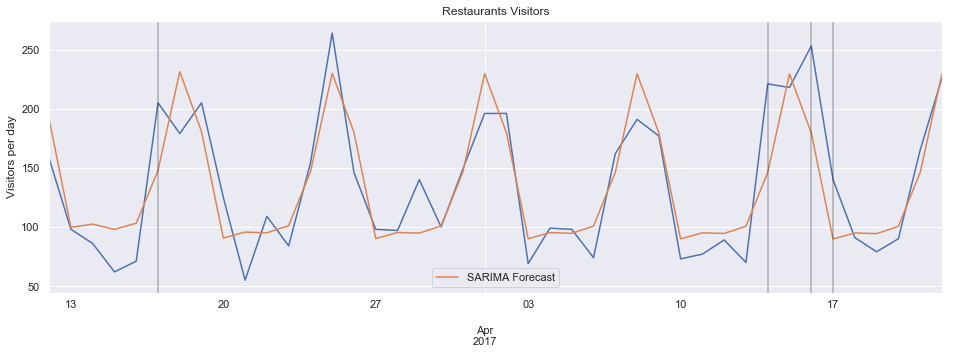

In [121]:
title="Restaurants Visitors"
ylabel='Visitors per day'
xlabel=''
ax=test.total.plot(figsize=(16,5),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x,color='k',alpha=.3)

In [124]:
model_exog=SARIMAX(train.total, exog=train.holiday, order=(3,1,1), seasonal_order=(1,1,1,7), enforce_invertibility=False )
results_exog=model_exog.fit()
results_exog.summary()
exog_forecast=test[['holiday']]
predictions_exog=results_exog.predict(start=start,end=end,exog=exog_forecast).rename('Exog predictions')

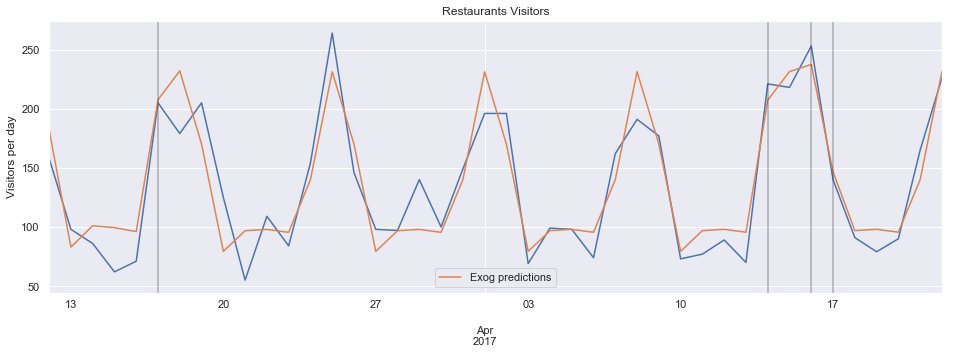

In [125]:
title="Restaurants Visitors"
ylabel='Visitors per day'
xlabel=''
ax=test.total.plot(figsize=(16,5),title=title)
predictions_exog.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x,color='k',alpha=.3)

In [128]:
rmse(test.total, fcast), rmse(test.total, predictions_exog)


(30.25050762050121, 23.312522009594783)